# Quantifying the World - Fall 2021
## Case Study 5 | Polish Bankruptcy Data
## Grant Bourzikas

## Abstract
The problem that has been brought to our data science team comes from Poland.  The data was collected from Emerging Markets Information Service, which is a database containing information on emerging markets around the world. The bankrupt companies were analyzed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013.

The goal of the study is to develop use multiple machine learning models specifically XGBoost and Random Forest.  However, because of the number of options and parameters, GridSearch and RandomizeddSearch will be leveraged to predict whether the polish companies will go bankrupt.    The Class feature is the independent variable (y) that will be used predict the whether the company will go Bankrupt. The dataset that was provided includes over 10,503 records with over 64 Discrete.

After reviewing the results of the algorithms, the clear winner from an accuracy standpoint was the XGBoost with Cross Validation model with 96.2% accuracy.  The lessons learned from the boosting iterations was key and understand the shape of the curve was important to understand how the model was fine tuning the residuals.   However, the big disappointment was the Random Forest model with the Gridsearch because of the time it took and the difficulty in coming to a model that made sense.  This is where the Random Forest model with the RandomizedSearch was key and show a large improvement not only in accuracy, but in the overall time it took the run the model

## Introduction
The problem that has been brought to our data science team comes from Poland.  The data was collected from Emerging Markets Information Service, which is a database containing information on emerging markets around the world. The bankrupt companies were analyzed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013.

The goal of the study is to develop use multiple machine learning models specifically XGBoost and Random Forest.  However, because of the number of options and parameters, GridSearch and RandomizeddSearch will be leveraged to predict whether the polish companies will go bankrupt.    The Class feature is the independent variable (y) that will be used predict the whether the company will go Bankrupt. The dataset that was provided includes over 10,503 records with over 64 Discrete.


In [161]:
print("Polish Bankruptcy Dataset - Rows:", bankrupt.shape[0], "Columns/Features", bankrupt.shape[0])

Polish Bankruptcy Dataset - Rows: 43405 Columns/Features 43405


Five data files were received that contained the Poland Bankruptcy data each representing one of the five years.  Since the datafile was in .arff format, it was determined the easiest solution was to aggregate the data into a csv before importing.  There are 64 features that were blind (later discovered the names of the features) without knowing the names or what the features were.

## Exploratory Data Analysis
After analyzing the data, a few data elements were missing across the features that need to be updated or deleted. Without addressing this problem, the models will not be inaccurate and will negatively affect the final predictions in regard to classification and accuracy. Reviewing each individual column, the data appears to be normally distributed after an analysis of value counts.   

To remediate the issues with missing data, all numbers were converted to numeric and the data features that were missing data were reclassified as not a number (NaN) in order to impute the data.  All NaN values where updated using the with the K Nearest Neighbors (KNNimputation algorithm), with nearest neighbor set to 3,   to find the best values for each NAN value and then he Standard Scaler was uses on all 64 features.

In [174]:
print("Number of NaN Values Before KNN Imputation", bank_df.isna().sum().sum())
print("Number of NaN Values After KNN Imputation", df.isnull().sum().sum())

Number of NaN Values Before KNN Imputation 41322
Number of NaN Values After KNN Imputation 0


## Model Overview
After the exploratory data analysis was performed, we develop the Random Forest model using GridSearchCV and RandomizedSearchCV models and XGBoost and XGBoostCV on the dataset. The following are the 4 models that were used to determine the binary classification problem on whether the individual would go bankrupt based on the 64 features:

1.	Random Forest using GridSearchCV
2.	Random Forest using RandomizedSearchCV 
3.	XGBoost
4.	XGBoost with cross validation

## Results
### Model 1 - Random Forest using GridSearchCV
For the Random Forest using GridSearchCV model , we were able to predict at the precision score, which is the ratio between true positives and all positives measuring all individuals that would file for bankruptcy, of score of 88.6%.  The recall score, which identifies all the true positives correctly, at 54.3% to determine if the individual would file for bankruptcy. 

During the model development using GridsearchCV, it was determined that the parameters would have to be narrowed down because the fitting of the model was expected to be over 12 hours which significantly reduced the score and more modeling was focused for the RandomizedSearch using RandomForest. 


### Model 2 - Random Forest using RandomizedSearchCV model
For the Random Forest using RandomizedSearchCV model , we were able to predict at the precision score, which is the ratio between true positives and all positives measuring all individuals that would file for bankruptcy, of score of 93.9%.  The recall score, which identifies all the true positives correctly, at 54.7% to determine if the individual would file for bankruptcy. 

There was an increase of 5.3% and it took 2 hours and 34 minutes to run as opposed to over 12 hours saving a significant amount of time.

{'n_estimators': 10, 'min_samples_split': 2, 'max_depth': 15, 'criterion': 'gini'}


<ipython-input-156-199f2d002f33>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['Not Bankrupt', 'Bankrupt']); ax.yaxis.set_ticklabels(['Not Bankrupt', 'Bankrupt']);


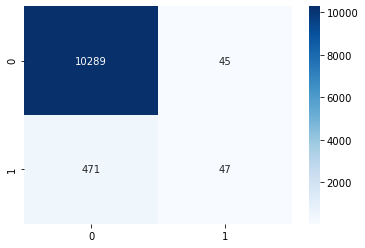

In [156]:
print(best_params)

sns.heatmap(cm, cmap="Blues", annot=True, fmt='d', ) # for decimal
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Bankrupt', 'Bankrupt']); ax.yaxis.set_ticklabels(['Not Bankrupt', 'Bankrupt']);


Reviewing the Confusion Matrix above, the key items are as follow:
- 47 - True Positive (TP): These are cases in which we predicted yes (they have be Spam), and they do have the disease.
- 10,289 - True Negative (TN): We predicted no, and they aren’t Spam.
- 45 - False Positive (FP): We predicted yes, but they aren’t Spam. (Type I error)
- 471 - False Negatives (FN): We predicted no, but they are Spam. (Type II error)

This means that the prediction did not work on the 23 False Positives and 471 False Negatives which results in the 93.9% accuracy score.


### Model 3 - XGBoost
In order to setup the XGBoost algorithm, we had to revisit the data model to ensure the data was in the proper format.  The data was reset into X, the feature dataframe, with the Standard Sacaler and y, the target classification predictor for whether the individual would file for bankruptcy.   The data was then split into Test and Train data and then converted into a XGBoost Matrix for “DTrain” and “DTest” data.   The next step was to convert this data into a list and build the following parameters for the model development. 

In [157]:
pprint(num_round)
pprint(param)


500
{'eta': 0.01, 'max_depth': 10, 'num_class': 10, 'objective': 'multi:softmax'}


The model was developed and it was determined that at 500 boosting iterations, the model was still improving and therefore the more iterations would be needed to optimize the mode.

### Model 4 – XGBoost with Cross Validation
Continuing from the learings with the basic XGBoost model, the parameters where updated using 1500 boosting rounds, cross validation of 5, and early stopping rounds set to 400. The results of the model demonstrated a strong improvement to 96.2% accuracy score with boosting iterations of 1,047 resulting in the following scores. 

In [158]:
pprint(out.iloc[-1])

train-mlogloss-mean    0.010054
train-mlogloss-std     0.000428
test-mlogloss-mean     0.118801
test-mlogloss-std      0.004490
Name: 1046, dtype: float64


This is demonstrated by increases the in model performance at 1046 record comparing to the last 5 iterations.  Additionally, comparing the number of boosting iterations and the score, you can see there were increases in model performance over the log loss of the mean until it reached the last record and stopped.

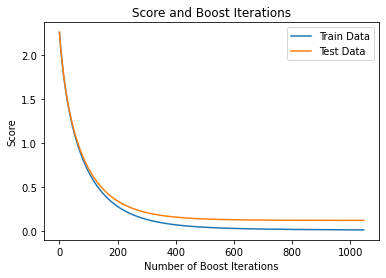

In [159]:
plt.plot(out['train-mlogloss-mean'], label='Train Data')
plt.plot(out['test-mlogloss-mean'], label='Test Data')
plt.ylabel('Score') 
plt.xlabel('Number of Boost Iterations') 
plt.title("Score and Boost Iterations")
plt.legend()
plt.show()


## Conclusion
After reviewing the results of the algorithms, the clear winner from an accuracy standpoint was the XGBoost with Cross Validation model with 96.2% accuracy.  The lessons learned from the boosting iterations was key and understand the shape of the curve was important to understand how the model was fine tuning the residuals.   However, the big disappointment was the Random Forest model with the Gridsearch because of the time it took and the difficulty in coming to a model that made sense.  This is where the Random Forest model with the RandomizedSearch was key and show a large improvement not only in accuracy, but in the overall time it took the run the model


In [135]:
# Begin Code

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.impute import KNNImputer
pd.set_option("display.max_columns", None)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from pprint import pprint
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import pickle
import xgboost as xgb

# Import Data

In [26]:
bankrupt = pd.read_csv('cs4_dataCSV.csv') 

/opt/miniconda3/envs/Grant_Base/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,5,6,7,10,11,13,14,15,18,19,20,22,23,24,25,29,30,31,35,36,38,39,42,43,44,48,49,51,55,56,57,58,59,62) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [27]:
print(bankrupt.shape)
bankrupt.head(5)
# bankrupt.drop(['Year'],axis=1)

(43405, 66)


,Year,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,Class
0,12/31/21,0.088238,0.55472,0.01134,1.0205,-66.52,0.34204,0.10949,0.57752,1.0881,0.32036,0.10949,0.1976,0.096885,0.10949,1475.2,0.24742,1.8027,0.10949,0.077287,50.199,1.1574,0.13523,0.062287,0.41949,0.32036,0.20912,1.0387,0.026093,6.1267,0.37788,0.077287,155.33,2.3498,0.24377,0.13523,1.4493,571.37,0.32101,0.095457,0.12879,0.11189,0.095457,127.3,77.096,0.45289,0.66883,54.621,0.10746,0.075859,1.0193,0.55407,0.42557,0.73717,0.73866,15182.0,0.080955,0.27543,0.91905,0.002024,7.2711,4.7343,142.76,2.5568,3.2597,0
1,12/31/21,-0.006202,0.48465,0.23298,1.5998,6.1825,0,-0.006202,1.0634,1.2757,0.51535,0.001329,-0.015967,0.037544,-0.006202,3693.4,0.098825,2.0634,-0.006202,-0.004862,59.923,1.0158,0.001289,-0.004862,?,0.080285,0.098825,0.17118,0.61545,4.0022,0.36381,0.000778,108.05,3.3779,2.7075,-0.036475,1.2757,5.2519,0.5938,-0.028591,0.05781,0.29167,0.001011,171.38,111.45,-0.029614,1.0606,58.258,-0.052809,-0.041395,1.2823,0.38846,0.29604,1.3614,1.5686,2341.8,-0.028591,-0.012035,1.0047,0.15222,6.0911,3.2749,111.14,3.2841,3.37,0
2,12/31/21,0.13024,0.22142,0.57751,3.6082,120.04,0.18764,0.16212,3.059,1.1415,0.67731,0.16212,0.73218,0.16568,0.16212,431.75,0.84539,4.5164,0.16212,0.14349,41.508,1.2362,0.14586,0.11528,0.23566,0.67731,0.70143,1.4737,2.8721,4.7622,0.050069,0.14349,81.653,4.4701,0.65878,0.14586,1.1698,?,0.67731,0.1291,1.3196,0.042587,0.1291,163.71,122.2,1.0137,3.028,47.382,0.1208,0.10692,3.6082,0.22142,0.22371,3.3684,3.3684,33401.0,0.12396,0.19229,0.87604,0,8.7934,2.987,71.531,5.1027,5.6188,0
3,12/31/21,-0.089951,0.887,0.26927,1.5222,-55.992,-0.073957,-0.089951,0.1274,1.2754,0.113,-0.080792,-0.17445,0.084038,-0.089951,3020.5,0.12084,1.1274,-0.089951,-0.070525,47.698,1.0942,0,-0.070525,?,0.064737,0.12084,0,1.2519,4.0153,0.65779,-0.13865,253.91,1.4375,0.83567,0.014027,1.2754,1.9005,0.4383,0.010998,0.45622,0.14998,0,157.3,109.6,-0.53969,1.199,82.073,-0.19714,-0.15456,0.88491,0.51564,0.69565,0.52538,2.0378,2789.6,0.41884,-0.79602,0.59074,2.8787,7.6524,3.3302,147.56,2.4735,5.9299,0
4,12/31/21,0.048179,0.55041,0.10765,1.2437,-22.959,0,0.05928,0.81682,1.515,0.44959,0.09199,0.13419,0.055575,0.05928,2386.1,0.15297,1.8168,0.05928,0.039129,36.074,0.99455,0.067616,0.031802,0,0.4292,0.1328,2.0671,0.23891,5.8823,0.36331,0.039129,140.12,2.6583,2.1336,0.3642,1.515,6.3783,0.51225,0.2404,0.067283,0.19828,0.044632,125.21,89.134,0.32177,0.90475,46.538,0.042701,0.028186,0.99819,0.44176,0.37618,0.99779,1.1369,1.2437,0.2404,0.10716,0.77048,0.13938,10.118,4.095,106.43,3.4294,3.3622,0


# Review Data

In [164]:
# Review Data Fields Again to Verify
df = bankrupt.copy()
bank_df = bankrupt.copy()
for columns in df:
    print(df[columns].value_counts())
    df[columns] = np.where(df[columns] == '?',np.nan, df[columns])
    print(df[columns].value_counts())

12/31/19    10503
12/31/18    10173
12/31/20     9792
12/31/17     7027
12/31/21     5910
Name: Year, dtype: int64
12/31/19    10503
12/31/18    10173
12/31/20     9792
12/31/17     7027
12/31/21     5910
Name: Year, dtype: int64
0            157
0.0           83
?              8
0.10591        6
0.10292        5
            ... 
-0.097162      1
-0.81502       1
0.0014722      1
0.026865       1
0.014946       1
Name: Attr1, Length: 39453, dtype: int64
0            157
0.0           83
0.10591        6
0.11322        5
0.10517        5
            ... 
-0.097162      1
-0.81502       1
0.0014722      1
0.026865       1
0.014946       1
Name: Attr1, Length: 39452, dtype: int64
0          65
0.0        24
?           8
0.35808     8
0.47717     5
           ..
0.16049     1
0.873       1
0.63191     1
0.8778      1
0.94648     1
Name: Attr2, Length: 38176, dtype: int64
0          65
0.0        24
0.35808     8
0.3935      5
0.73067     5
           ..
0.16049     1
0.873       1
0.63191

0         2011
0.0         42
34.213       7
10.325       6
17.36        5
          ... 
2263.6       1
16.957       1
54.905       1
499.11       1
24.275       1
Name: Attr20, Length: 34609, dtype: int64
?          5854
1            63
0            26
1.0236       19
1.0271       17
           ... 
0.88648       1
1.7235        1
2.3246        1
0.92165       1
0.89574       1
Name: Attr21, Length: 19223, dtype: int64
1          63
0          26
1.0236     19
1.0271     17
1.0789     16
           ..
0.91651     1
0.65731     1
0.43014     1
0.63259     1
0.89574     1
Name: Attr21, Length: 19222, dtype: int64
0            2306
0.0          1686
?               8
0.11216         5
0.12403         5
             ... 
-0.16676        1
-0.078941       1
0.064992        1
-0.028214       1
0.049167        1
Name: Attr22, Length: 35740, dtype: int64
0            2306
0.0          1686
0.10741         5
0.1018          5
0.11684         5
             ... 
-0.16676        1
-0.078941    

0           3893
0.0           94
0.1056         6
0.12239        6
0.11387        5
            ... 
0.030897       1
0.32522        1
0.036168       1
-1.3567        1
0.016558       1
Name: Attr42, Length: 34545, dtype: int64
?         127
0          52
119.59     11
136.34     11
100.47     10
         ... 
239.29      1
53.181      1
81.102      1
96.82       1
111.72      1
Name: Attr43, Length: 31059, dtype: int64
0         52
119.59    11
136.34    11
117.2     10
100.47    10
          ..
239.29     1
53.181     1
81.102     1
96.82      1
111.72     1
Name: Attr43, Length: 31058, dtype: int64
?         127
0          89
0.0         8
100.47      7
40.374      6
         ... 
35.436      1
111.26      1
42.057      1
67.856      1
87.443      1
Name: Attr44, Length: 35131, dtype: int64
0         89
0.0        8
100.47     7
118.72     6
104.12     6
          ..
35.436     1
111.26     1
42.057     1
67.856     1
87.443     1
Name: Attr44, Length: 35130, dtype: int64
?        

In [165]:
bank_df = df.copy()
print(df.Attr3.isna().sum())
print(df.Attr3.value_counts())

8
0           22
1           16
1.0          5
0.2258       5
0.19356      5
            ..
0.15614      1
0.6118       1
-0.10486     1
-0.259       1
0.03211      1
Name: Attr3, Length: 39315, dtype: int64


In [166]:
# Check for NA's
print(df.isna().sum())
df.isna().sum().sum()

Year        0
Attr1       8
Attr2       8
Attr3       8
Attr4     134
         ... 
Attr61    102
Attr62    127
Attr63    134
Attr64    812
Class       0
Length: 66, dtype: int64


41322

In [167]:
# Test for NAN's
df1 = df[df.isna().any(axis=1)]
df1.head()

,Year,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,Class
1,12/31/21,-0.006202,0.48465,0.23298,1.5998,6.1825,0,-0.006202,1.0634,1.2757,0.51535,0.001329,-0.015967,0.037544,-0.006202,3693.4,0.098825,2.0634,-0.006202,-0.004862,59.923,1.0158,0.001289,-0.004862,NaN,0.080285,0.098825,0.17118,0.61545,4.0022,0.36381,0.000778,108.05,3.3779,2.7075,-0.036475,1.2757,5.2519,0.5938,-0.028591,0.05781,0.29167,0.001011,171.38,111.45,-0.029614,1.0606,58.258,-0.052809,-0.041395,1.2823,0.38846,0.29604,1.3614,1.5686,2341.8,-0.028591,-0.012035,1.0047,0.15222,6.0911,3.2749,111.14,3.2841,3.37,0.0
2,12/31/21,0.13024,0.22142,0.57751,3.6082,120.04,0.18764,0.16212,3.059,1.1415,0.67731,0.16212,0.73218,0.16568,0.16212,431.75,0.84539,4.5164,0.16212,0.14349,41.508,1.2362,0.14586,0.11528,0.23566,0.67731,0.70143,1.4737,2.8721,4.7622,0.050069,0.14349,81.653,4.4701,0.65878,0.14586,1.1698,NaN,0.67731,0.1291,1.3196,0.042587,0.1291,163.71,122.2,1.0137,3.028,47.382,0.1208,0.10692,3.6082,0.22142,0.22371,3.3684,3.3684,33401.0,0.12396,0.19229,0.87604,0,8.7934,2.987,71.531,5.1027,5.6188,0.0
3,12/31/21,-0.089951,0.887,0.26927,1.5222,-55.992,-0.073957,-0.089951,0.1274,1.2754,0.113,-0.080792,-0.17445,0.084038,-0.089951,3020.5,0.12084,1.1274,-0.089951,-0.070525,47.698,1.0942,0,-0.070525,NaN,0.064737,0.12084,0,1.2519,4.0153,0.65779,-0.13865,253.91,1.4375,0.83567,0.014027,1.2754,1.9005,0.4383,0.010998,0.45622,0.14998,0,157.3,109.6,-0.53969,1.199,82.073,-0.19714,-0.15456,0.88491,0.51564,0.69565,0.52538,2.0378,2789.6,0.41884,-0.79602,0.59074,2.8787,7.6524,3.3302,147.56,2.4735,5.9299,0.0
5,12/31/21,0.23156,0.51047,0.47291,1.9393,15.102,0,0.28769,0.95899,1.7915,0.48953,0.33362,0.57139,0.16689,0.28769,623.17,0.58572,1.959,0.28769,0.16059,79.225,1.2748,0.32983,0.12926,NaN,0.48616,0.47576,7.1814,20.047,4.1709,0.1731,0.16679,125.72,2.9033,2.8637,0.32968,1.7915,84.275,0.4965,0.18403,0.44404,0.04988,0.18411,153.38,74.157,0.5955,1.167,97.092,0.31854,0.1778,1.9128,0.5035,0.34443,20.751,21.047,7008.8,0.18403,0.47303,0.83996,0.014242,4.6071,4.922,102.58,3.5581,75.941,0.0
9,12/31/21,0.29343,0.58649,0.083392,1.1694,-55.152,-0.28211,0.29343,0.70507,1.6376,0.41351,0.30572,0.59621,0.22868,0.29343,571.63,0.63852,1.7051,0.29343,0.17919,37.194,1.4744,0,0.17919,NaN,0.19634,0.63852,0,0.19648,4.3536,0.33125,0.38954,168.46,2.1666,1.8182,0.025565,1.6376,47.009,0.42221,0.015611,0.22658,0.2412,0,103.43,66.238,1.7585,0.83039,57.118,-0.081052,-0.049495,0.98137,0.49217,0.46154,0.97426,0.99474,1882.3,0.34882,0.70961,0.7215,0.021024,9.8135,5.5104,109.7,3.3273,3.8582,0.0


In [168]:
df.columns

Index(['Year', 'Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7',
       'Attr8', 'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14',
       'Attr15', 'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21',
       'Attr22', 'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28',
       'Attr29', 'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35',
       'Attr36', 'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42',
       'Attr43', 'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49',
       'Attr50', 'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56',
       'Attr57', 'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63',
       'Attr64', 'Class'],
      dtype='object')

In [169]:
df['Year'] = pd.to_datetime(df['Year'])
cols = df.columns.drop('Year')
df[cols] = df[cols].apply(pd.to_numeric)
df = df[cols].apply(pd.to_numeric)
df.head()
# df.drop(['Year'],axis=1)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,Class
0,0.088238,0.55472,0.01134,1.0205,-66.5200,0.342040,0.109490,0.57752,1.0881,0.32036,0.109490,0.197600,0.096885,0.109490,1475.20,0.247420,1.8027,0.109490,0.077287,50.199,1.15740,0.135230,0.062287,0.41949,0.320360,0.209120,1.03870,0.026093,6.1267,0.377880,0.077287,155.330,2.3498,0.24377,0.135230,1.4493,571.3700,0.32101,0.095457,0.128790,0.111890,0.095457,127.30,77.096,0.452890,0.66883,54.621,0.107460,0.075859,1.01930,0.55407,0.42557,0.73717,0.73866,15182.0000,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597,0.0
1,-0.006202,0.48465,0.23298,1.5998,6.1825,0.000000,-0.006202,1.06340,1.2757,0.51535,0.001329,-0.015967,0.037544,-0.006202,3693.40,0.098825,2.0634,-0.006202,-0.004862,59.923,1.01580,0.001289,-0.004862,NaN,0.080285,0.098825,0.17118,0.615450,4.0022,0.363810,0.000778,108.050,3.3779,2.70750,-0.036475,1.2757,5.2519,0.59380,-0.028591,0.057810,0.291670,0.001011,171.38,111.450,-0.029614,1.06060,58.258,-0.052809,-0.041395,1.28230,0.38846,0.29604,1.36140,1.56860,2341.8000,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.3700,0.0
2,0.130240,0.22142,0.57751,3.6082,120.0400,0.187640,0.162120,3.05900,1.1415,0.67731,0.162120,0.732180,0.165680,0.162120,431.75,0.845390,4.5164,0.162120,0.143490,41.508,1.23620,0.145860,0.115280,0.23566,0.677310,0.701430,1.47370,2.872100,4.7622,0.050069,0.143490,81.653,4.4701,0.65878,0.145860,1.1698,NaN,0.67731,0.129100,1.319600,0.042587,0.129100,163.71,122.200,1.013700,3.02800,47.382,0.120800,0.106920,3.60820,0.22142,0.22371,3.36840,3.36840,33401.0000,0.123960,0.192290,0.87604,0.000000,8.7934,2.9870,71.531,5.1027,5.6188,0.0
3,-0.089951,0.88700,0.26927,1.5222,-55.9920,-0.073957,-0.089951,0.12740,1.2754,0.11300,-0.080792,-0.174450,0.084038,-0.089951,3020.50,0.120840,1.1274,-0.089951,-0.070525,47.698,1.09420,0.000000,-0.070525,NaN,0.064737,0.120840,0.00000,1.251900,4.0153,0.657790,-0.138650,253.910,1.4375,0.83567,0.014027,1.2754,1.9005,0.43830,0.010998,0.456220,0.149980,0.000000,157.30,109.600,-0.539690,1.19900,82.073,-0.197140,-0.154560,0.88491,0.51564,0.69565,0.52538,2.03780,2789.6000,0.418840,-0.796020,0.59074,2.878700,7.6524,3.3302,147.560,2.4735,5.9299,0.0
4,0.048179,0.55041,0.10765,1.2437,-22.9590,0.000000,0.059280,0.81682,1.5150,0.44959,0.091990,0.134190,0.055575,0.059280,2386.10,0.152970,1.8168,0.059280,0.039129,36.074,0.99455,0.067616,0.031802,0.00000,0.429200,0.132800,2.06710,0.238910,5.8823,0.363310,0.039129,140.120,2.6583,2.13360,0.364200,1.5150,6.3783,0.51225,0.240400,0.067283,0.198280,0.044632,125.21,89.134,0.321770,0.90475,46.538,0.042701,0.028186,0.99819,0.44176,0.37618,0.99779,1.13690,1.2437,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.3622,0.0


In [170]:
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,Class
0,0.088238,0.55472,0.01134,1.0205,-66.5200,0.342040,0.109490,0.57752,1.0881,0.32036,0.109490,0.197600,0.096885,0.109490,1475.20,0.247420,1.8027,0.109490,0.077287,50.199,1.15740,0.135230,0.062287,0.41949,0.320360,0.209120,1.03870,0.026093,6.1267,0.377880,0.077287,155.330,2.3498,0.24377,0.135230,1.4493,571.3700,0.32101,0.095457,0.128790,0.111890,0.095457,127.30,77.096,0.452890,0.66883,54.621,0.107460,0.075859,1.01930,0.55407,0.42557,0.73717,0.73866,15182.0000,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597,0.0
1,-0.006202,0.48465,0.23298,1.5998,6.1825,0.000000,-0.006202,1.06340,1.2757,0.51535,0.001329,-0.015967,0.037544,-0.006202,3693.40,0.098825,2.0634,-0.006202,-0.004862,59.923,1.01580,0.001289,-0.004862,NaN,0.080285,0.098825,0.17118,0.615450,4.0022,0.363810,0.000778,108.050,3.3779,2.70750,-0.036475,1.2757,5.2519,0.59380,-0.028591,0.057810,0.291670,0.001011,171.38,111.450,-0.029614,1.06060,58.258,-0.052809,-0.041395,1.28230,0.38846,0.29604,1.36140,1.56860,2341.8000,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.3700,0.0
2,0.130240,0.22142,0.57751,3.6082,120.0400,0.187640,0.162120,3.05900,1.1415,0.67731,0.162120,0.732180,0.165680,0.162120,431.75,0.845390,4.5164,0.162120,0.143490,41.508,1.23620,0.145860,0.115280,0.23566,0.677310,0.701430,1.47370,2.872100,4.7622,0.050069,0.143490,81.653,4.4701,0.65878,0.145860,1.1698,NaN,0.67731,0.129100,1.319600,0.042587,0.129100,163.71,122.200,1.013700,3.02800,47.382,0.120800,0.106920,3.60820,0.22142,0.22371,3.36840,3.36840,33401.0000,0.123960,0.192290,0.87604,0.000000,8.7934,2.9870,71.531,5.1027,5.6188,0.0
3,-0.089951,0.88700,0.26927,1.5222,-55.9920,-0.073957,-0.089951,0.12740,1.2754,0.11300,-0.080792,-0.174450,0.084038,-0.089951,3020.50,0.120840,1.1274,-0.089951,-0.070525,47.698,1.09420,0.000000,-0.070525,NaN,0.064737,0.120840,0.00000,1.251900,4.0153,0.657790,-0.138650,253.910,1.4375,0.83567,0.014027,1.2754,1.9005,0.43830,0.010998,0.456220,0.149980,0.000000,157.30,109.600,-0.539690,1.19900,82.073,-0.197140,-0.154560,0.88491,0.51564,0.69565,0.52538,2.03780,2789.6000,0.418840,-0.796020,0.59074,2.878700,7.6524,3.3302,147.560,2.4735,5.9299,0.0
4,0.048179,0.55041,0.10765,1.2437,-22.9590,0.000000,0.059280,0.81682,1.5150,0.44959,0.091990,0.134190,0.055575,0.059280,2386.10,0.152970,1.8168,0.059280,0.039129,36.074,0.99455,0.067616,0.031802,0.00000,0.429200,0.132800,2.06710,0.238910,5.8823,0.363310,0.039129,140.120,2.6583,2.13360,0.364200,1.5150,6.3783,0.51225,0.240400,0.067283,0.198280,0.044632,125.21,89.134,0.321770,0.90475,46.538,0.042701,0.028186,0.99819,0.44176,0.37618,0.99779,1.13690,1.2437,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.3622,0.0


# Impute Missing Data

In [171]:
# Impute MIssing Data with KNN - COuld set to 5
imputer = KNNImputer(n_neighbors=3) 
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [172]:
df.isna().sum().sum()

0

# GridSearch - Random Forest

In [37]:
X_train = df.drop(['Class'],axis=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# 
# X_train = X_train.values
y = df['Class'].values
y_train = df['Class'].values

In [39]:
# print(y_train.shape)
# print(X_train.shape)
# print(y_test.shape)
# print(X_test.shape)

In [40]:
tuned_parameters = {'n_estimators': [100, 300, 500], 
                    'criterion': ['gini'],
                    'max_depth':[15],
                    'min_samples_split':[5] 
                   }
scores = ['precision', 'recall']
rf = RandomForestClassifier(n_jobs=-1)

In [41]:
%%time
for score in scores:
    print("# Tuning hyper-parameters for *** %s ***" % score)
    print()

    clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

#     print("Detailed classification report:")
#     print()
#     print("The model is trained on the full development set.")
#     print("The scores are computed on the full evaluation set.")
#     print()
#     y_true, y_pred = y_test, clf.predict(X_test) # NEed to Add Back 
#     print(classification_report(y_true, y_pred)) # NEed to Add Back
#     print()

# Tuning hyper-parameters for *** precision ***

Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 100}

Grid scores on development set:

0.877 (+/-0.126) for {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 100}
0.874 (+/-0.139) for {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 300}
0.874 (+/-0.132) for {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 500}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.


# Tuning hyper-parameters for *** recall ***

Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 100}

Grid scores on development set:

0.527 (+/-0.012) for {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 100}
0.527 (+/-0.014) 

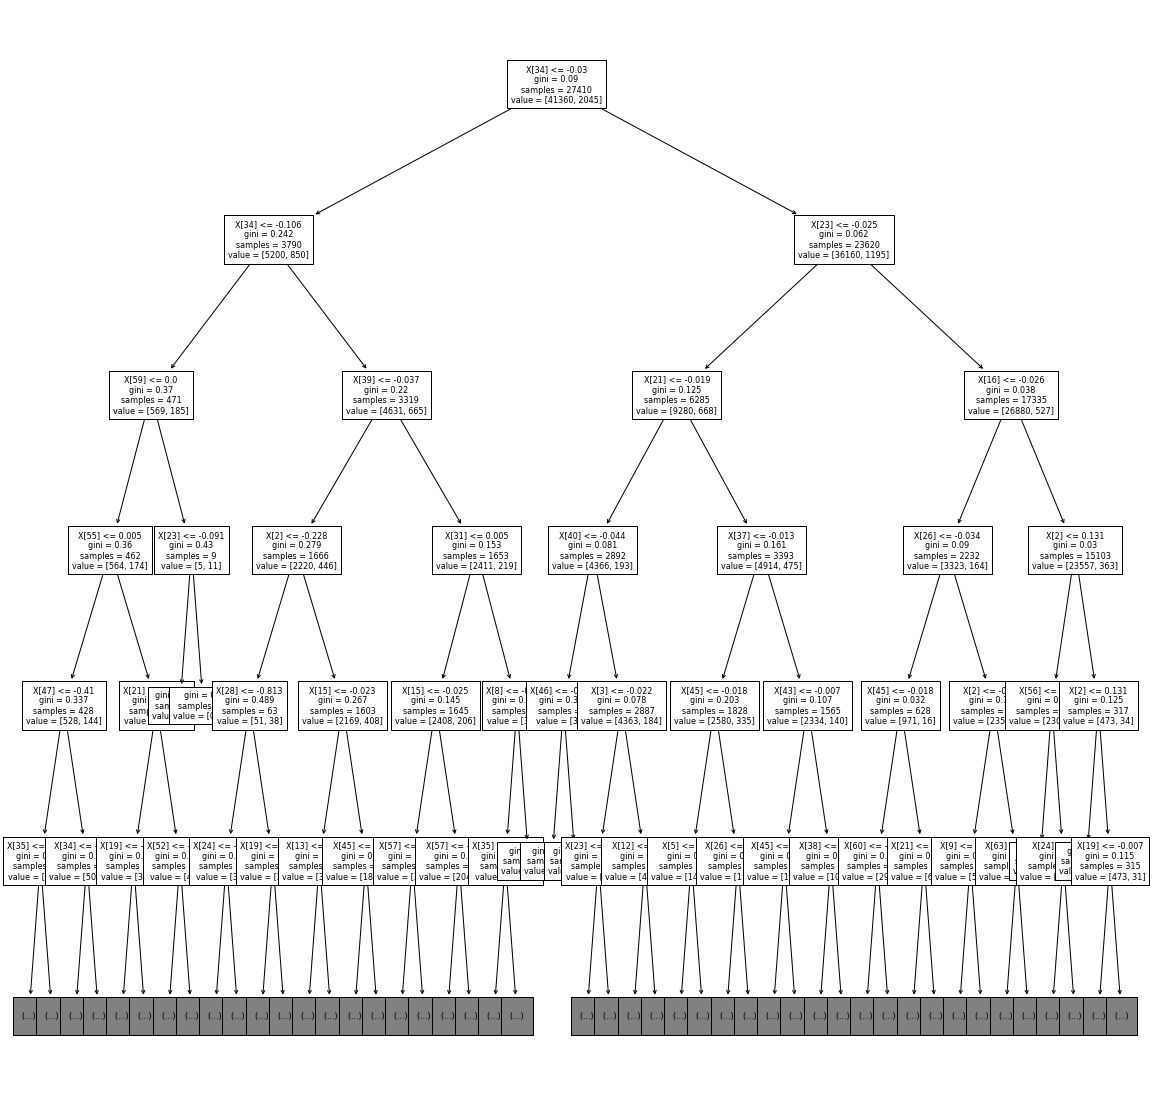

In [65]:
from sklearn import tree
plt.figure(figsize=(20,20))  # set plot size (denoted in inches)
tree.plot_tree(clf.best_estimator_.estimators_[1], fontsize=8, max_depth=5)
plt.show()

In [44]:
# filename = 'clf_RF_Recall_Precision.sav'
# pickle.dump(clf, open(filename, 'wb'))

# Randomized Search - Random Forest

In [66]:
tuned_parameters = {'n_estimators': [10,50, 100, 300, 500], 
                    'criterion': ['gini', 'entropy'],
                    'max_depth':[5,10,15],
                    'min_samples_split':[2,4,9] 
                   }
scores = ['precision', 'recall']
sgd = SGDClassifier¶(n_jobs=-1)

In [67]:
%%time
for score in scores:
    print("# Tuning hyper-parameters for *** %s ***" % score)
    print()

    clf = RandomizedSearchCV(RandomForestClassifier(), tuned_parameters, cv=5, n_iter=30, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
#     y_true, y_pred = y_test, clf.predict(X_test) # NEed to Add Back 
#     print(classification_report(y_true, y_pred)) # NEed to Add Back
    print()

# Tuning hyper-parameters for *** precision ***



/opt/miniconda3/envs/Grant_Base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/Grant_Base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/Grant_Base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/Grant_Base/lib/python3

/opt/miniconda3/envs/Grant_Base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/Grant_Base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/Grant_Base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/Grant_Base/lib/python3

Best parameters set found on development set:

{'n_estimators': 50, 'min_samples_split': 4, 'max_depth': 10, 'criterion': 'entropy'}

Grid scores on development set:

0.855 (+/-0.061) for {'n_estimators': 10, 'min_samples_split': 2, 'max_depth': 10, 'criterion': 'entropy'}
0.476 (+/-0.000) for {'n_estimators': 300, 'min_samples_split': 2, 'max_depth': 5, 'criterion': 'entropy'}
0.476 (+/-0.000) for {'n_estimators': 50, 'min_samples_split': 4, 'max_depth': 5, 'criterion': 'entropy'}
0.935 (+/-0.084) for {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 10, 'criterion': 'entropy'}
0.476 (+/-0.000) for {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 5, 'criterion': 'entropy'}
0.924 (+/-0.109) for {'n_estimators': 500, 'min_samples_split': 4, 'max_depth': 10, 'criterion': 'entropy'}
0.905 (+/-0.094) for {'n_estimators': 100, 'min_samples_split': 9, 'max_depth': 15, 'criterion': 'entropy'}
0.829 (+/-0.101) for {'n_estimators': 10, 'min_samples_split': 9, 'max_depth': 15, 

In [68]:
filename = 'clf_RandomizedSearch_Recall_Precision.sav'
pickle.dump(clf, open(filename, 'wb'))
 
# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

In [69]:
best_params = clf.best_params_
print(best_params)

{'n_estimators': 10, 'min_samples_split': 2, 'max_depth': 15, 'criterion': 'gini'}


In [70]:
# unpacking the best_params into our new model
best_forest = RandomForestClassifier(**best_params)

In [73]:
# SPlit Data If Needed
X = df.drop(['Class'],axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = df['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=76)

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     10334
         1.0       0.51      0.09      0.15       518

    accuracy                           0.95     10852
   macro avg       0.73      0.54      0.56     10852
weighted avg       0.93      0.95      0.94     10852

CPU times: user 1.89 s, sys: 13.3 ms, total: 1.9 s
Wall time: 1.87 s


[Text(0, 0.5, 'Not Bankrupt'), Text(0, 1.5, 'Bankrupt')]

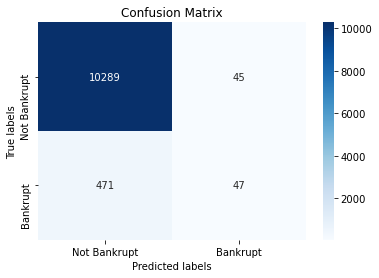

In [74]:
%%time
from sklearn.metrics import confusion_matrix
import seaborn as sns 

# Fitting our model to the train set
fit_forest = best_forest.fit(X_train, y_train)
# Creating predicted variables to compare against y_test
y_pred = fit_forest.predict(X_test)
# making classification report and confusion matrix
print(classification_report(y_test, y_pred))

ax= plt.subplot()

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap="Blues", annot=True, fmt='d', ) # for decimal

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Bankrupt', 'Bankrupt']); ax.yaxis.set_ticklabels(['Not Bankrupt', 'Bankrupt']);

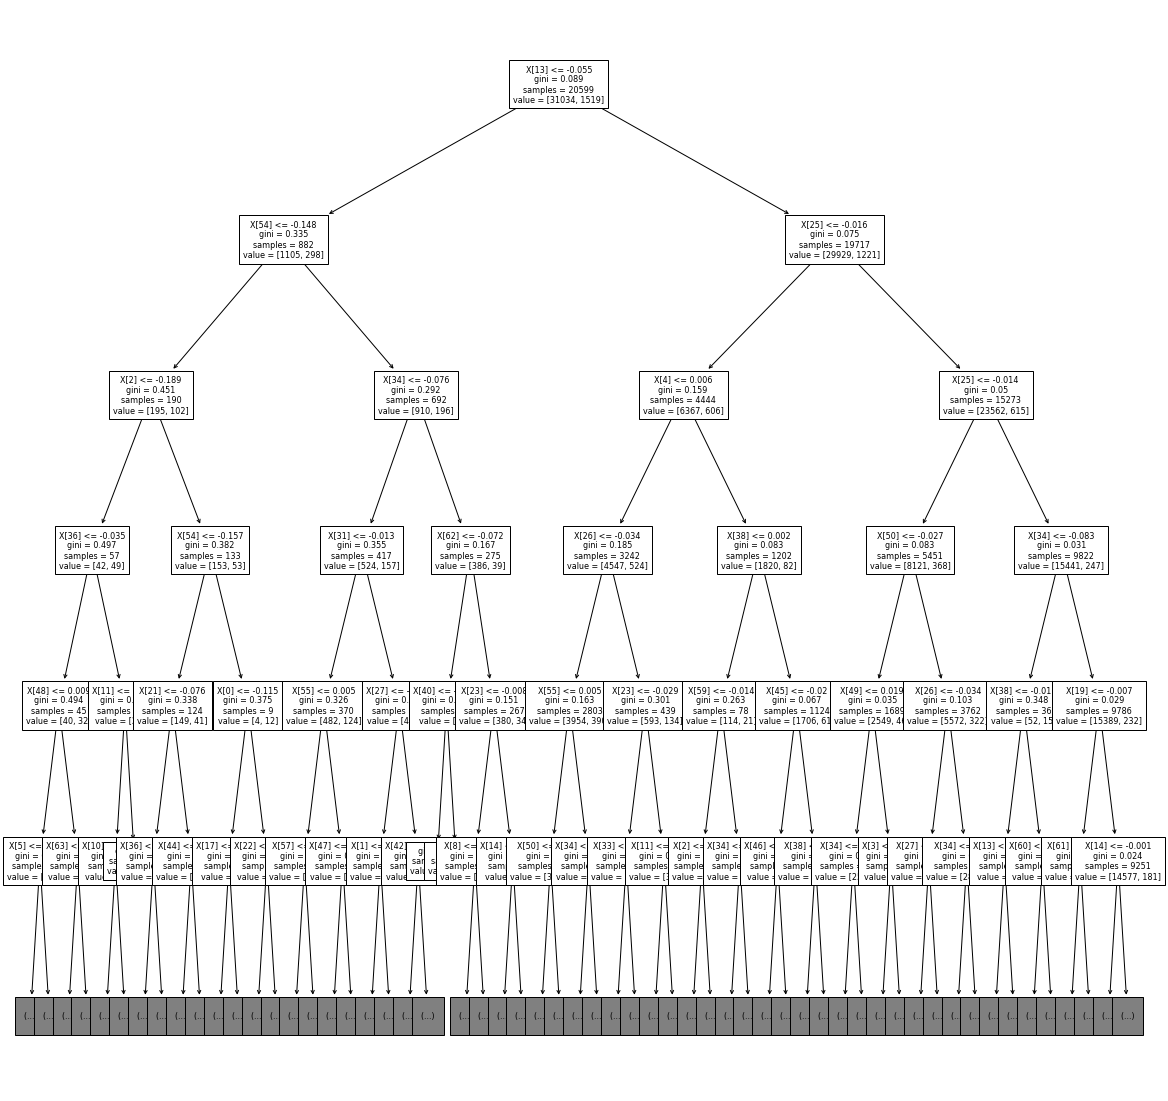

In [79]:
from sklearn import tree
plt.figure(figsize=(20,20))  # set plot size (denoted in inches)
tree.plot_tree(fit_forest.estimators_[0], fontsize=8, max_depth=5)
plt.show()


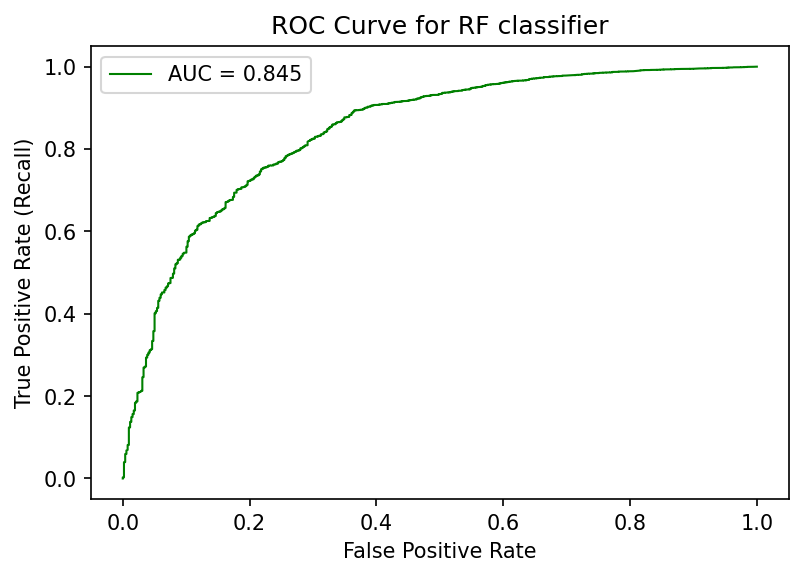

In [97]:
# ROC Curve for Random Forest
from sklearn.metrics import RocCurveDisplay

# get the probability distribution
probas = fit_forest.predict_proba(X_test)
# plot
# plt.figure(dpi=150)
# plt.hist(probas, bins=20)
# plt.title('Classification Probabilities')
# plt.xlabel('Probability')
# plt.ylabel('# of Instances')
# plt.xlim([0.5, 1.0])
# plt.show()

from sklearn.metrics import roc_curve, auc
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()


In [98]:
filename = 'fit_forest.sav'
pickle.dump(fit_forest, open(filename, 'wb'))

# XGBoost

In [99]:
X = df.drop(['Class'],axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = df['Class'].values


In [100]:
# SPlit Data If Needed
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=76)

In [101]:
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(32553,)
(32553, 64)
(10852,)
(10852, 64)


In [102]:
dtrain = xgb.DMatrix(X_train,label=y_train)
dtest = xgb.DMatrix(X_test,label=y_test)

In [103]:
evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [104]:
num_round = 500 # Large Stopped at 499
param = {
    'max_depth': 10,
    'objective': 'multi:softmax',
    'num_class': 10,
    'eta': 0.01
    }
pprint(param)

{'eta': 0.01, 'max_depth': 10, 'num_class': 10, 'objective': 'multi:softmax'}


In [105]:
%%time
my_model = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=5)

[08:21:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	eval-mlogloss:2.25697	train-mlogloss:2.25657
[1]	eval-mlogloss:2.21351	train-mlogloss:2.21258
[2]	eval-mlogloss:2.17204	train-mlogloss:2.17071
[3]	eval-mlogloss:2.13231	train-mlogloss:2.13056
[4]	eval-mlogloss:2.09425	train-mlogloss:2.09202
[5]	eval-mlogloss:2.05774	train-mlogloss:2.05500
[6]	eval-mlogloss:2.02260	train-mlogloss:2.01940
[7]	eval-mlogloss:1.98881	train-mlogloss:1.98512
[8]	eval-mlogloss:1.95609	train-mlogloss:1.95202
[9]	eval-mlogloss:1.92458	train-mlogloss:1.92005
[10]	eval-mlogloss:1.89417	train-mlogloss:1.88919
[11]	eval-mlogloss:1.86481	train-mlogloss:1.85935
[12]	eval-mlogloss:1.83634	train-mlogloss:1.83043
[13]	eval-mlogloss:1.80872	train-mlogloss:1

[157]	eval-mlogloss:0.44696	train-mlogloss:0.39979
[158]	eval-mlogloss:0.44374	train-mlogloss:0.39635
[159]	eval-mlogloss:0.44053	train-mlogloss:0.39292
[160]	eval-mlogloss:0.43734	train-mlogloss:0.38952
[161]	eval-mlogloss:0.43417	train-mlogloss:0.38614
[162]	eval-mlogloss:0.43109	train-mlogloss:0.38285
[163]	eval-mlogloss:0.42800	train-mlogloss:0.37953
[164]	eval-mlogloss:0.42498	train-mlogloss:0.37632
[165]	eval-mlogloss:0.42196	train-mlogloss:0.37307
[166]	eval-mlogloss:0.41901	train-mlogloss:0.36991
[167]	eval-mlogloss:0.41606	train-mlogloss:0.36674
[168]	eval-mlogloss:0.41316	train-mlogloss:0.36364
[169]	eval-mlogloss:0.41027	train-mlogloss:0.36053
[170]	eval-mlogloss:0.40745	train-mlogloss:0.35750
[171]	eval-mlogloss:0.40462	train-mlogloss:0.35446
[172]	eval-mlogloss:0.40182	train-mlogloss:0.35144
[173]	eval-mlogloss:0.39906	train-mlogloss:0.34844
[174]	eval-mlogloss:0.39633	train-mlogloss:0.34548
[175]	eval-mlogloss:0.39364	train-mlogloss:0.34254
[176]	eval-mlogloss:0.39098	tra

[318]	eval-mlogloss:0.18853	train-mlogloss:0.11563
[319]	eval-mlogloss:0.18786	train-mlogloss:0.11486
[320]	eval-mlogloss:0.18721	train-mlogloss:0.11411
[321]	eval-mlogloss:0.18654	train-mlogloss:0.11336
[322]	eval-mlogloss:0.18590	train-mlogloss:0.11261
[323]	eval-mlogloss:0.18526	train-mlogloss:0.11187
[324]	eval-mlogloss:0.18461	train-mlogloss:0.11114
[325]	eval-mlogloss:0.18397	train-mlogloss:0.11040
[326]	eval-mlogloss:0.18334	train-mlogloss:0.10967
[327]	eval-mlogloss:0.18272	train-mlogloss:0.10896
[328]	eval-mlogloss:0.18211	train-mlogloss:0.10824
[329]	eval-mlogloss:0.18149	train-mlogloss:0.10753
[330]	eval-mlogloss:0.18089	train-mlogloss:0.10684
[331]	eval-mlogloss:0.18028	train-mlogloss:0.10615
[332]	eval-mlogloss:0.17968	train-mlogloss:0.10545
[333]	eval-mlogloss:0.17907	train-mlogloss:0.10477
[334]	eval-mlogloss:0.17848	train-mlogloss:0.10410
[335]	eval-mlogloss:0.17790	train-mlogloss:0.10343
[336]	eval-mlogloss:0.17732	train-mlogloss:0.10276
[337]	eval-mlogloss:0.17674	tra

[479]	eval-mlogloss:0.13141	train-mlogloss:0.04688
[480]	eval-mlogloss:0.13126	train-mlogloss:0.04668
[481]	eval-mlogloss:0.13107	train-mlogloss:0.04646
[482]	eval-mlogloss:0.13093	train-mlogloss:0.04625
[483]	eval-mlogloss:0.13079	train-mlogloss:0.04604
[484]	eval-mlogloss:0.13060	train-mlogloss:0.04582
[485]	eval-mlogloss:0.13045	train-mlogloss:0.04560
[486]	eval-mlogloss:0.13031	train-mlogloss:0.04539
[487]	eval-mlogloss:0.13016	train-mlogloss:0.04518
[488]	eval-mlogloss:0.13000	train-mlogloss:0.04497
[489]	eval-mlogloss:0.12985	train-mlogloss:0.04477
[490]	eval-mlogloss:0.12971	train-mlogloss:0.04457
[491]	eval-mlogloss:0.12956	train-mlogloss:0.04437
[492]	eval-mlogloss:0.12940	train-mlogloss:0.04417
[493]	eval-mlogloss:0.12925	train-mlogloss:0.04396
[494]	eval-mlogloss:0.12908	train-mlogloss:0.04375
[495]	eval-mlogloss:0.12891	train-mlogloss:0.04353
[496]	eval-mlogloss:0.12877	train-mlogloss:0.04334
[497]	eval-mlogloss:0.12861	train-mlogloss:0.04312
[498]	eval-mlogloss:0.12845	tra

In [106]:
print(my_model.best_iteration)
print(my_model.best_score)

499
0.042732


In [107]:
%%time
out = xgb.cv(params=param, 
             dtrain=dtrain, 
             num_boost_round=1500, 
             nfold=5, 
             verbose_eval=True, 
             early_stopping_rounds=400)

[08:24:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:24:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:24:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:24:31] WARNING: /Users/runner/miniforge3/cond

[101]	train-mlogloss:0.66439+0.00118	test-mlogloss:0.70264+0.00350
[102]	train-mlogloss:0.65806+0.00120	test-mlogloss:0.69659+0.00353
[103]	train-mlogloss:0.65179+0.00121	test-mlogloss:0.69060+0.00354
[104]	train-mlogloss:0.64560+0.00121	test-mlogloss:0.68469+0.00355
[105]	train-mlogloss:0.63949+0.00122	test-mlogloss:0.67886+0.00356
[106]	train-mlogloss:0.63344+0.00121	test-mlogloss:0.67308+0.00355
[107]	train-mlogloss:0.62745+0.00120	test-mlogloss:0.66736+0.00357
[108]	train-mlogloss:0.62152+0.00119	test-mlogloss:0.66171+0.00357
[109]	train-mlogloss:0.61566+0.00119	test-mlogloss:0.65612+0.00358
[110]	train-mlogloss:0.60988+0.00119	test-mlogloss:0.65060+0.00360
[111]	train-mlogloss:0.60415+0.00117	test-mlogloss:0.64515+0.00361
[112]	train-mlogloss:0.59850+0.00115	test-mlogloss:0.63977+0.00362
[113]	train-mlogloss:0.59292+0.00114	test-mlogloss:0.63446+0.00365
[114]	train-mlogloss:0.58737+0.00113	test-mlogloss:0.62919+0.00365
[115]	train-mlogloss:0.58192+0.00114	test-mlogloss:0.62401+0.0

[224]	train-mlogloss:0.22787+0.00060	test-mlogloss:0.29410+0.00356
[225]	train-mlogloss:0.22606+0.00060	test-mlogloss:0.29248+0.00355
[226]	train-mlogloss:0.22428+0.00062	test-mlogloss:0.29089+0.00356
[227]	train-mlogloss:0.22251+0.00062	test-mlogloss:0.28932+0.00357
[228]	train-mlogloss:0.22076+0.00063	test-mlogloss:0.28775+0.00357
[229]	train-mlogloss:0.21902+0.00063	test-mlogloss:0.28620+0.00358
[230]	train-mlogloss:0.21730+0.00064	test-mlogloss:0.28467+0.00359
[231]	train-mlogloss:0.21561+0.00064	test-mlogloss:0.28315+0.00359
[232]	train-mlogloss:0.21392+0.00064	test-mlogloss:0.28164+0.00360
[233]	train-mlogloss:0.21225+0.00065	test-mlogloss:0.28015+0.00361
[234]	train-mlogloss:0.21060+0.00067	test-mlogloss:0.27867+0.00361
[235]	train-mlogloss:0.20896+0.00067	test-mlogloss:0.27721+0.00361
[236]	train-mlogloss:0.20733+0.00068	test-mlogloss:0.27574+0.00361
[237]	train-mlogloss:0.20572+0.00068	test-mlogloss:0.27430+0.00361
[238]	train-mlogloss:0.20412+0.00067	test-mlogloss:0.27287+0.0

[347]	train-mlogloss:0.09378+0.00037	test-mlogloss:0.17636+0.00373
[348]	train-mlogloss:0.09317+0.00038	test-mlogloss:0.17587+0.00373
[349]	train-mlogloss:0.09257+0.00040	test-mlogloss:0.17538+0.00373
[350]	train-mlogloss:0.09197+0.00040	test-mlogloss:0.17489+0.00374
[351]	train-mlogloss:0.09138+0.00041	test-mlogloss:0.17440+0.00374
[352]	train-mlogloss:0.09079+0.00042	test-mlogloss:0.17393+0.00375
[353]	train-mlogloss:0.09021+0.00043	test-mlogloss:0.17344+0.00375
[354]	train-mlogloss:0.08963+0.00044	test-mlogloss:0.17298+0.00376
[355]	train-mlogloss:0.08906+0.00045	test-mlogloss:0.17251+0.00376
[356]	train-mlogloss:0.08849+0.00045	test-mlogloss:0.17205+0.00377
[357]	train-mlogloss:0.08793+0.00046	test-mlogloss:0.17160+0.00377
[358]	train-mlogloss:0.08736+0.00047	test-mlogloss:0.17114+0.00377
[359]	train-mlogloss:0.08680+0.00049	test-mlogloss:0.17069+0.00377
[360]	train-mlogloss:0.08624+0.00049	test-mlogloss:0.17025+0.00377
[361]	train-mlogloss:0.08570+0.00050	test-mlogloss:0.16981+0.0

[470]	train-mlogloss:0.04628+0.00066	test-mlogloss:0.13889+0.00353
[471]	train-mlogloss:0.04605+0.00067	test-mlogloss:0.13872+0.00353
[472]	train-mlogloss:0.04582+0.00067	test-mlogloss:0.13855+0.00352
[473]	train-mlogloss:0.04559+0.00067	test-mlogloss:0.13838+0.00352
[474]	train-mlogloss:0.04537+0.00067	test-mlogloss:0.13822+0.00350
[475]	train-mlogloss:0.04515+0.00066	test-mlogloss:0.13806+0.00349
[476]	train-mlogloss:0.04493+0.00067	test-mlogloss:0.13791+0.00349
[477]	train-mlogloss:0.04471+0.00067	test-mlogloss:0.13775+0.00349
[478]	train-mlogloss:0.04449+0.00067	test-mlogloss:0.13760+0.00347
[479]	train-mlogloss:0.04427+0.00067	test-mlogloss:0.13744+0.00347
[480]	train-mlogloss:0.04405+0.00068	test-mlogloss:0.13730+0.00346
[481]	train-mlogloss:0.04384+0.00067	test-mlogloss:0.13715+0.00345
[482]	train-mlogloss:0.04362+0.00066	test-mlogloss:0.13700+0.00344
[483]	train-mlogloss:0.04341+0.00066	test-mlogloss:0.13686+0.00343
[484]	train-mlogloss:0.04320+0.00066	test-mlogloss:0.13671+0.0

[593]	train-mlogloss:0.02739+0.00040	test-mlogloss:0.12597+0.00388
[594]	train-mlogloss:0.02729+0.00040	test-mlogloss:0.12592+0.00387
[595]	train-mlogloss:0.02719+0.00040	test-mlogloss:0.12586+0.00387
[596]	train-mlogloss:0.02709+0.00040	test-mlogloss:0.12580+0.00387
[597]	train-mlogloss:0.02700+0.00040	test-mlogloss:0.12574+0.00388
[598]	train-mlogloss:0.02691+0.00040	test-mlogloss:0.12568+0.00387
[599]	train-mlogloss:0.02682+0.00040	test-mlogloss:0.12563+0.00388
[600]	train-mlogloss:0.02673+0.00040	test-mlogloss:0.12556+0.00388
[601]	train-mlogloss:0.02664+0.00040	test-mlogloss:0.12551+0.00388
[602]	train-mlogloss:0.02656+0.00040	test-mlogloss:0.12545+0.00389
[603]	train-mlogloss:0.02647+0.00040	test-mlogloss:0.12538+0.00389
[604]	train-mlogloss:0.02638+0.00040	test-mlogloss:0.12533+0.00389
[605]	train-mlogloss:0.02630+0.00040	test-mlogloss:0.12527+0.00389
[606]	train-mlogloss:0.02621+0.00040	test-mlogloss:0.12521+0.00390
[607]	train-mlogloss:0.02613+0.00040	test-mlogloss:0.12516+0.0

[716]	train-mlogloss:0.01906+0.00038	test-mlogloss:0.12131+0.00425
[717]	train-mlogloss:0.01901+0.00038	test-mlogloss:0.12130+0.00426
[718]	train-mlogloss:0.01897+0.00039	test-mlogloss:0.12127+0.00426
[719]	train-mlogloss:0.01892+0.00038	test-mlogloss:0.12125+0.00426
[720]	train-mlogloss:0.01888+0.00039	test-mlogloss:0.12124+0.00426
[721]	train-mlogloss:0.01883+0.00038	test-mlogloss:0.12121+0.00427
[722]	train-mlogloss:0.01878+0.00039	test-mlogloss:0.12119+0.00427
[723]	train-mlogloss:0.01873+0.00039	test-mlogloss:0.12116+0.00428
[724]	train-mlogloss:0.01868+0.00038	test-mlogloss:0.12114+0.00428
[725]	train-mlogloss:0.01863+0.00038	test-mlogloss:0.12112+0.00429
[726]	train-mlogloss:0.01859+0.00038	test-mlogloss:0.12110+0.00429
[727]	train-mlogloss:0.01854+0.00038	test-mlogloss:0.12108+0.00429
[728]	train-mlogloss:0.01849+0.00039	test-mlogloss:0.12106+0.00430
[729]	train-mlogloss:0.01845+0.00039	test-mlogloss:0.12103+0.00430
[730]	train-mlogloss:0.01839+0.00039	test-mlogloss:0.12101+0.0

[839]	train-mlogloss:0.01438+0.00042	test-mlogloss:0.11946+0.00451
[840]	train-mlogloss:0.01435+0.00042	test-mlogloss:0.11946+0.00450
[841]	train-mlogloss:0.01433+0.00042	test-mlogloss:0.11945+0.00450
[842]	train-mlogloss:0.01430+0.00042	test-mlogloss:0.11944+0.00450
[843]	train-mlogloss:0.01427+0.00042	test-mlogloss:0.11944+0.00450
[844]	train-mlogloss:0.01424+0.00042	test-mlogloss:0.11943+0.00449
[845]	train-mlogloss:0.01422+0.00042	test-mlogloss:0.11942+0.00449
[846]	train-mlogloss:0.01419+0.00042	test-mlogloss:0.11942+0.00449
[847]	train-mlogloss:0.01417+0.00041	test-mlogloss:0.11941+0.00448
[848]	train-mlogloss:0.01413+0.00042	test-mlogloss:0.11940+0.00448
[849]	train-mlogloss:0.01411+0.00041	test-mlogloss:0.11939+0.00448
[850]	train-mlogloss:0.01409+0.00041	test-mlogloss:0.11938+0.00447
[851]	train-mlogloss:0.01406+0.00042	test-mlogloss:0.11937+0.00447
[852]	train-mlogloss:0.01403+0.00041	test-mlogloss:0.11937+0.00446
[853]	train-mlogloss:0.01401+0.00041	test-mlogloss:0.11936+0.0

[962]	train-mlogloss:0.01147+0.00044	test-mlogloss:0.11892+0.00439
[963]	train-mlogloss:0.01145+0.00044	test-mlogloss:0.11892+0.00439
[964]	train-mlogloss:0.01143+0.00044	test-mlogloss:0.11892+0.00439
[965]	train-mlogloss:0.01141+0.00045	test-mlogloss:0.11891+0.00440
[966]	train-mlogloss:0.01139+0.00044	test-mlogloss:0.11891+0.00439
[967]	train-mlogloss:0.01136+0.00044	test-mlogloss:0.11891+0.00440
[968]	train-mlogloss:0.01134+0.00044	test-mlogloss:0.11890+0.00440
[969]	train-mlogloss:0.01132+0.00044	test-mlogloss:0.11890+0.00440
[970]	train-mlogloss:0.01130+0.00045	test-mlogloss:0.11891+0.00440
[971]	train-mlogloss:0.01128+0.00045	test-mlogloss:0.11890+0.00440
[972]	train-mlogloss:0.01126+0.00044	test-mlogloss:0.11890+0.00440
[973]	train-mlogloss:0.01124+0.00045	test-mlogloss:0.11890+0.00439
[974]	train-mlogloss:0.01122+0.00045	test-mlogloss:0.11890+0.00439
[975]	train-mlogloss:0.01121+0.00045	test-mlogloss:0.11889+0.00438
[976]	train-mlogloss:0.01119+0.00045	test-mlogloss:0.11889+0.0

[1084]	train-mlogloss:0.00952+0.00043	test-mlogloss:0.11883+0.00454
[1085]	train-mlogloss:0.00950+0.00043	test-mlogloss:0.11883+0.00453
[1086]	train-mlogloss:0.00949+0.00043	test-mlogloss:0.11883+0.00453
[1087]	train-mlogloss:0.00948+0.00043	test-mlogloss:0.11883+0.00453
[1088]	train-mlogloss:0.00946+0.00043	test-mlogloss:0.11883+0.00453
[1089]	train-mlogloss:0.00945+0.00043	test-mlogloss:0.11883+0.00453
[1090]	train-mlogloss:0.00944+0.00043	test-mlogloss:0.11883+0.00453
[1091]	train-mlogloss:0.00943+0.00043	test-mlogloss:0.11883+0.00452
[1092]	train-mlogloss:0.00942+0.00043	test-mlogloss:0.11884+0.00452
[1093]	train-mlogloss:0.00940+0.00043	test-mlogloss:0.11884+0.00453
[1094]	train-mlogloss:0.00939+0.00043	test-mlogloss:0.11885+0.00452
[1095]	train-mlogloss:0.00937+0.00043	test-mlogloss:0.11885+0.00452
[1096]	train-mlogloss:0.00936+0.00043	test-mlogloss:0.11885+0.00452
[1097]	train-mlogloss:0.00935+0.00043	test-mlogloss:0.11885+0.00453
[1098]	train-mlogloss:0.00934+0.00043	test-mlogl

[1205]	train-mlogloss:0.00813+0.00043	test-mlogloss:0.11933+0.00464
[1206]	train-mlogloss:0.00812+0.00043	test-mlogloss:0.11933+0.00465
[1207]	train-mlogloss:0.00811+0.00043	test-mlogloss:0.11933+0.00465
[1208]	train-mlogloss:0.00810+0.00043	test-mlogloss:0.11934+0.00466
[1209]	train-mlogloss:0.00809+0.00043	test-mlogloss:0.11934+0.00466
[1210]	train-mlogloss:0.00808+0.00043	test-mlogloss:0.11934+0.00466
[1211]	train-mlogloss:0.00807+0.00043	test-mlogloss:0.11934+0.00467
[1212]	train-mlogloss:0.00806+0.00042	test-mlogloss:0.11935+0.00466
[1213]	train-mlogloss:0.00805+0.00042	test-mlogloss:0.11935+0.00467
[1214]	train-mlogloss:0.00804+0.00042	test-mlogloss:0.11935+0.00467
[1215]	train-mlogloss:0.00803+0.00042	test-mlogloss:0.11936+0.00467
[1216]	train-mlogloss:0.00802+0.00042	test-mlogloss:0.11936+0.00468
[1217]	train-mlogloss:0.00801+0.00042	test-mlogloss:0.11937+0.00468
[1218]	train-mlogloss:0.00800+0.00042	test-mlogloss:0.11937+0.00468
[1219]	train-mlogloss:0.00799+0.00041	test-mlogl

[1326]	train-mlogloss:0.00703+0.00036	test-mlogloss:0.11976+0.00488
[1327]	train-mlogloss:0.00703+0.00036	test-mlogloss:0.11977+0.00487
[1328]	train-mlogloss:0.00702+0.00036	test-mlogloss:0.11977+0.00488
[1329]	train-mlogloss:0.00701+0.00036	test-mlogloss:0.11977+0.00488
[1330]	train-mlogloss:0.00700+0.00036	test-mlogloss:0.11978+0.00488
[1331]	train-mlogloss:0.00700+0.00036	test-mlogloss:0.11978+0.00489
[1332]	train-mlogloss:0.00699+0.00035	test-mlogloss:0.11979+0.00489
[1333]	train-mlogloss:0.00698+0.00036	test-mlogloss:0.11980+0.00489
[1334]	train-mlogloss:0.00697+0.00035	test-mlogloss:0.11980+0.00489
[1335]	train-mlogloss:0.00696+0.00035	test-mlogloss:0.11981+0.00489
[1336]	train-mlogloss:0.00696+0.00035	test-mlogloss:0.11981+0.00489
[1337]	train-mlogloss:0.00695+0.00035	test-mlogloss:0.11982+0.00489
[1338]	train-mlogloss:0.00694+0.00035	test-mlogloss:0.11982+0.00490
[1339]	train-mlogloss:0.00694+0.00035	test-mlogloss:0.11983+0.00490
[1340]	train-mlogloss:0.00693+0.00035	test-mlogl

In [108]:
filename = 'Out_XGBoost.sav'
pickle.dump(out, open(filename, 'wb'))

In [109]:
# # load the model from disk
# out = pickle.load(open('Out_XGBoost.sav', 'rb'))
# # print(result)

In [110]:
out.tail()

,train-mlogloss-mean,train-mlogloss-std,test-mlogloss-mean,test-mlogloss-std
1042,0.010117,0.000432,0.118806,0.004486
1043,0.010102,0.000431,0.118801,0.004490
1044,0.010084,0.000430,0.118803,0.004488
1045,0.010072,0.000428,0.118805,0.004486
1046,0.010054,0.000428,0.118801,0.004490


In [111]:
pprint(out.iloc[-1])

train-mlogloss-mean    0.010054
train-mlogloss-std     0.000428
test-mlogloss-mean     0.118801
test-mlogloss-std      0.004490
Name: 1046, dtype: float64


In [112]:
# out
out.sort_values(by='test-mlogloss-mean', ascending=True)

,train-mlogloss-mean,train-mlogloss-std,test-mlogloss-mean,test-mlogloss-std
1046,0.010054,0.000428,0.118801,0.004490
1043,0.010102,0.000431,0.118801,0.004490
1044,0.010084,0.000430,0.118803,0.004488
1040,0.010150,0.000431,0.118804,0.004478
1045,0.010072,0.000428,0.118805,0.004486
...,...,...,...,...
4,2.092135,0.000122,2.094724,0.000485
3,2.130608,0.000061,2.132685,0.000359
2,2.170742,0.000057,2.172296,0.000297
1,2.212652,0.000035,2.213692,0.000201


In [113]:
my_model.predict(dtest)

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

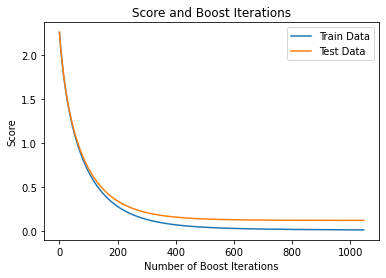

In [114]:
plt.plot(out['train-mlogloss-mean'], label='Train Data')
plt.plot(out['test-mlogloss-mean'], label='Test Data')
plt.ylabel('Score') 
plt.xlabel('Number of Boost Iterations') 
plt.title("Score and Boost Iterations")
plt.legend()
plt.show()

In [115]:
XGBoost_AC = accuracy_score(my_model.predict(dtest), y_test)
print("The Best XG Boost Accuracy Score is:", XGBoost_AC)

The Best XG Boost Accuracy Score is: 0.9624953925543679


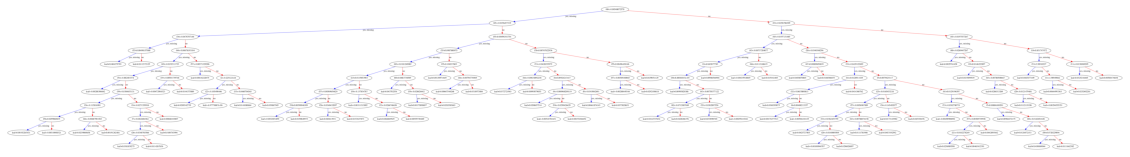

In [129]:
fig, ax = plt.subplots(figsize=(20, 20))
xgb.plot_tree(my_model, num_trees=10, ax=ax)
plt.show()